In [1]:
from math import sqrt
from scipy import stats

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pydataset import data
import statistics

α = 0.05

#### 1. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices.
#### A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. 
#### A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

 - Tailed-ness: This is a two tailed test because we are testing specifically for inequality, not if one office is greater than or less than in this case.
 - One sample or two sample/independent?: two sample. we are comparing the results of office #1 and office #2, as opposed to one of the sales of these offfices compared to the population mean of Ace Reality offices on the whole

Form a hypothesis:

$H_0$ = The sales time at office #1 is equivalent to the sales time at office #2
$H_a$ = The sales time on average at office #1 are inequal to the average sales time at office #2

Significance level $\alpha$ = 0.05

T-test using descriptive stats: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind_from_stats.html



In [2]:
# stats.norm(mean, std).rvs(# samples)
office_1 = stats.norm(90, 15).rvs(40)
office_2 = stats.norm(100, 20).rvs(50)


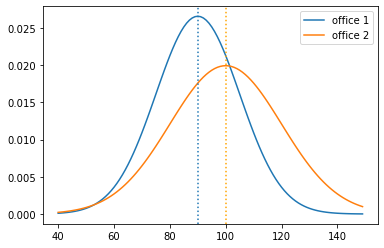

In [5]:
x = np.arange(40, 150)
y1 = stats.norm(90, 15).pdf(x)
y2 = stats.norm(100, 20).pdf(x)
plt.plot(x, y1, label='office 1')
plt.plot(x, y2, label = 'office 2')
plt.axvline(90, ls=':')
plt.axvline(100, ls=':', color='orange')
plt.legend()
plt.show()

In [6]:
# normality: we were literally told they were normal, also there are enough samples to support CLT
# independence: offices appear to be separate and we have no indication that there is any bleed-through between offices
# variance: levene test them!
# performing a levene test for variance:
# H0: The variance in office 1 is equivalent to the variance in office 2
# Ha: The variance in office 2 is inequal to the variance in office 1
# alpha: 0.05
stat, p_val = stats.levene(office_1, office_2)

In [7]:
if p_val < 0.05:
    print('We can reject H0 ==> inequal variance')

We can reject H0 ==> inequal variance


In [8]:
t_stat, p_val = stats.ttest_ind(office_1, office_2, equal_var=False)

In [9]:
if p_val < α:
    print('Our p-value is less than alpha and we can reject the null hypothesis, indicating some difference in the sales time between the offices.')

In [10]:
p_val

0.14624976701895498

- We note that simulating the random values from the distributive stats are not providing us with the level of detail that we may want out of a problem like this.  In order to get the most ideal results possible, we will conduct a slightly different variation of the test using ttest_ind_from_stats, which is more alligned with the information that has been posited to us in this specific scenario.

In [12]:
t_stat, pval = stats.ttest_ind_from_stats(90,15,40,100,20,50, equal_var=False)

In [14]:
if pval < α:
    print('Our p-value is less than alpha and we can reject the null hypothesis, indicating some difference in the sales time between the offices.')

Our p-value is less than alpha and we can reject the null hypothesis, indicating some difference in the sales time between the offices.


### 2. Load the mpg dataset and use it to answer the following questions:

a. Is there a difference in fuel-efficiency in cars from 2008 vs 1999?  

- One tail/ Two tailed? Two tailed: looking specifically for inequality
- One sample/ Two sample? Two sample (independent) Looking to compare values across cars manufactured specifically in 2008 versus cars specifically in 1999
- For this one, we will perform a ttest_ind on these two subsets of our data

- H0: The fuel efficiency in cars made in 2008 is equal to the fuel efficiency in cars manufactured in 1999
- Ha:The fuel efficiency in cars made in 2008 is inequal to the fuel efficiency in cars manufactured in 1999

b. Are compact cars more fuel-efficient than the average car?  

- One tailed or two tailed? One-tailed: we want to say that compact cars average mileage > all cars average mileage
- One sample or two sample? One sample.  We care comparing compacts to overall cars

$H_0$ Compact car average mileage <= all vehicle average mileage

$H_a$ Compact car average mileage > all vehicle average mileage

- p/2 will be compared to alpha as opposed to just p (because of the one tail)
- t stat should be positive if we feed compact car value into our function first

c. Do manual cars get better gas mileage than automatic cars?

 - One tailed or two tailed? One-tailed, manual cars getting better gas mileage than automatic cars
 - One sample or two sample? Two sampled, manual cars and automatic cars are discrete categories
 
 $H_0$ The average mileage of manual cars =< the average mileage in automatic cars
 
 $H_a$ The average mileage of manual cars > the average mileage in automatic cars
 
- One sample test: compare p/2 pay attention to t_stat positivity

In [17]:
mpg = data('mpg')

In [18]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [19]:
# notes on pandas manipulations that we need to do to do these experiments:
# engineer an average mileage column in order to make the fuel efficiency comparisons
# capture transmissions that are automatic or manual for that specific comparison

Calculate average fuel economy assuming 50% highway and 50% city driving


- Should I use arithmetic mean or harmonic mean for average mpg?
    - Arithmetic Mean: fe_am = (cty + hwy)/2
    - Harmonic Mean: fe_hm = 2/(1/cty + 1/hwy)

In [20]:
# lets make that average mileage:
mpg['avg_fe'] = stats.hmean(mpg[['cty','hwy']], axis=1)

In [21]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_fe
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524


#### 1.  Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

Comparing fuel economy two different sub-groups (2-sample, 2-tailed t-test)


$H_0$ The fuel efficiency in cars made in 2008 is equal to the fuel efficiency in cars manufactured in 1999

$H_a$: The fuel efficiency in cars made in 2008 is inequal to the fuel efficiency in cars manufactured in 1999

In [23]:
# mpg.info() ==> establish that year is a numtype, not a string value

In [24]:
# separate my independent groups:
# mpg dataset where the year is 2008, specificially the avg_fe col
fe_2008 = mpg[mpg.year == 2008].avg_fe
# mpg dataset where the year is 1999, specificially the avg_fe col
fe_1999 = mpg[mpg.year == 1999].avg_fe

<AxesSubplot:>

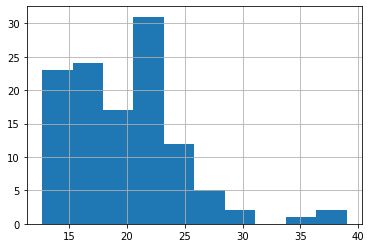

In [27]:
# plot distribution for fe_1999
fe_1999.hist()

<AxesSubplot:>

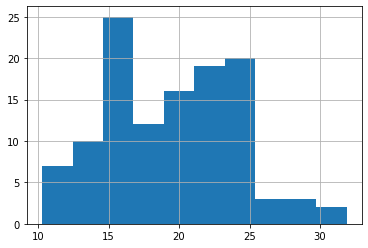

In [26]:
# plot distribution for fe_2008
fe_2008.hist()

In [28]:
fe_2008.shape, fe_1999.shape

((117,), (117,))

In [ ]:
# how many observations I have for each sample? (N>30,we we meet normality condition)
# we can assert that CLT is going to do its thing appropriately and can presume normality
# we know these are independent, otherwise the pandas masking would not have worked the way it did

In [30]:
# is the variance same for both sample?
# levene test:
# H0: there is equal variance in avg_fe from 2008 and 1999
# Ha: there is inequal variance in avg_fe from 2008 and 1999

stat, pval = stats.levene(fe_1999, fe_2008)
if pval < α:
    print('we can reject the null hypothesis and posit that variance is inequal')

In [ ]:
# parameter review:
# roughly normal (relying on CLT, due to sample size)
# independent (no values in 1999 cars that are in 2008 cars)
# variances are equal (backed up by levene testing)

In [33]:
# calculate t-statistic and p value
t_stat, pval = stats.ttest_ind(fe_1999, fe_2008)
t_stat, pval


(0.3011962975077886, 0.7635345888327115)

In [35]:
print(f'''
Because p ({pval:.3f}) > alpha (.05), we fail to reject the null\
 hypothesis that there is no difference in fuel-efficency in cars\
 from 2008 and 1999.
''')


Because p (0.764) > alpha (.05), we fail to reject the null hypothesis that there is no difference in fuel-efficency in cars from 2008 and 1999.



#### 2. Are compact cars more fuel-efficient than the average car?


Comparing fuel economy of one group with population mean  (1-sample, 1-tailed t-test)

$H_0$ Compact car average mileage <= all vehicle average mileage

$H_a$ Compact car average mileage > all vehicle average mileage

for $H_a$ to be true, t > 0 and  p/2 < 0.05

In [36]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_fe
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524


In [37]:
mpg['class'].value_counts()

suv           62
compact       47
midsize       41
subcompact    35
pickup        33
minivan       11
2seater        5
Name: class, dtype: int64

In [38]:
# get our series values for our compact cars
# mpg where mpg.class is equal to 'compact', specifically the avg_fe col
fe_compacts = mpg[mpg['class'] == 'compact'].avg_fe
fe_overall = mpg.avg_fe.mean()

In [ ]:
# mu is the average fuel efficiency for *ALL* cars in mpg

In [39]:
fe_compacts.shape

(47,)

<AxesSubplot:>

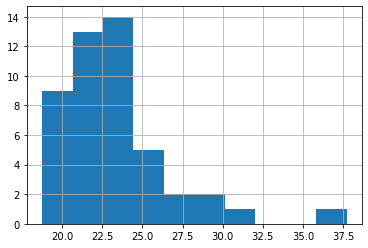

In [40]:
# look at distribution of fuel economy of compact cars. It also shows > 30 observations
# so we meet normality assunption for t-test

fe_compacts.hist()

In [41]:
# calculate t and p values:
# get our t and p values by comparing
# args: observed_values, population mean
t_stat, p = stats.ttest_1samp(fe_compacts, fe_overall)

In [42]:
if (t_stat > 0) and ((p/2) < α):
    print('we can reject the null hypothesis')

we can reject the null hypothesis


In [43]:
print(f'''
Because p/2 ({p/2:.12f}) < alpha (.05), we reject the null hypothesis that there isno difference in fuel-efficiency between compact cars and the overall average.
''')


Because p/2 (0.000000000781) < alpha (.05), we reject the null hypothesis that there isno difference in fuel-efficiency between compact cars and the overall average.



#### Do manual cars get better gas mileage than automatic cars?

- One-sample or two-sample t test?
- 1-tailed or 2-tailed?

$H_0$ The average mileage of manual cars =< the average mileage in automatic cars
 
$H_a$ The average mileage of manual cars > the average mileage in automatic cars

In [46]:
mpg.trans.str.contains('manual')

1      False
2       True
3       True
4      False
5      False
       ...  
230    False
231     True
232    False
233     True
234    False
Name: trans, Length: 234, dtype: bool

In [44]:
mpg.trans.value_counts()

auto(l4)      83
manual(m5)    58
auto(l5)      39
manual(m6)    19
auto(s6)      16
auto(l6)       6
auto(av)       5
auto(s5)       3
auto(s4)       3
auto(l3)       2
Name: trans, dtype: int64

In [47]:
# we will look at average fuel efficiency for auto cars, and manual cars
manual_fe = mpg[mpg.trans.str.contains('manual')].avg_fe
auto_fe = mpg[mpg.trans.str.contains('auto')].avg_fe

(array([ 2.,  9., 10., 21., 23.,  5.,  4.,  1.,  0.,  2.]),
 array([10.28571429, 13.15587703, 16.02603978, 18.89620253, 21.76636528,
        24.63652803, 27.50669078, 30.37685353, 33.24701627, 36.11717902,
        38.98734177]),
 <BarContainer object of 10 artists>)

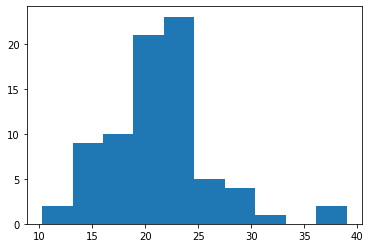

In [48]:
# look at the distribution. N >30

plt.hist(manual_fe)

(array([ 6., 35., 27., 22., 33., 18.,  9.,  4.,  2.,  1.]),
 array([10.28571429, 12.65428571, 15.02285714, 17.39142857, 19.76      ,
        22.12857143, 24.49714286, 26.86571429, 29.23428571, 31.60285714,
        33.97142857]),
 <BarContainer object of 10 artists>)

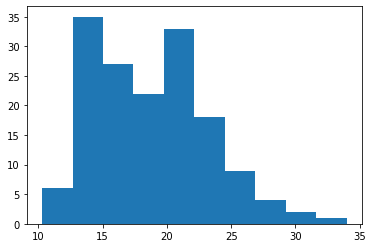

In [49]:
# look at the distribution. N >30
plt.hist(auto_fe)


In [51]:
# look at variances
# h0: equivalent variance
# ha: inequivalent variance
stats.levene(manual_fe, auto_fe)

LeveneResult(statistic=0.013901207169738269, pvalue=0.9062462281015493)

In [ ]:
# p value is over 0.05, so i cant reject the idea that these have equal variances.

In [ ]:
# parameter review:
# roughly normal (sample size, CLT, cursory visual investigation)
# independent samples (no cars that are both automatic and manual)
# equal variances (via levene test)

In [53]:
t, p = stats.ttest_ind(manual_fe, auto_fe)

In [55]:
if (t > 0) and ((p/2) < α):
    print('We can reject our null hypothesis')
else:
    print('we cannot reject our null hypothesis')

We can reject our null hypothesis


In [57]:
p/2

2.7552323050220026e-06

In [59]:
t

4.652577547151351

In [56]:
print(f'''
Because p/2 ({p/2:.6f}) < alpha (.05), we reject the null hypothesis that there is no difference in gas mileage between manual and automatic cars
''')


Because p/2 (0.000003) < alpha (.05), we reject the null hypothesis that there is no difference in gas mileage between manual and automatic cars

